open data got by Spyder：

In [1]:
import pandas as pd
import numpy as np
from get_data import open_exl
from pubg import asfloat

asia = open_exl('pubg_as.xls', 0)
eu = open_exl('pubg_eu.xls', 0)
na = open_exl('pubg_na.xls', 0)
oc = open_exl('pubg_oc.xls', 0)
sea = open_exl('pubg_sea.xls', 0)

data = np.vstack((asia, eu[1: ], na[1: ], oc[1: ], sea[1: ]))
df = pd.DataFrame({data[0, i]:data[1:, i] for i in range(data.shape[1])})
df

,AVG Distance In Vehicle,AVG Distance On Foot,AVG Survival Time,Headshot Kill Ratio,KDA,Top 10 Rate,Win Rate
0,1.14 km,6.90 km,22m,81.94%,64.44,77.63%,68.42%
1,4.62 km,2.51 km,28m,30.42%,37.00,90.00%,79.09%
2,3.00 km,2.01 km,24m,42.20%,13.69,66.22%,50.00%
3,2.72 km,1.22 km,26m,27.35%,4.53,67.44%,38.37%
4,2.97 km,2.18 km,25m,20.06%,43.46,76.00%,67.20%
5,3.30 km,2.17 km,24m,25.11%,6.74,61.37%,35.38%
6,8.10 km,2.75 km,26m,17.14%,2.60,64.74%,24.92%
7,0.05 km,5.56 km,22m,88.13%,133.00,81.67%,81.67%
8,4.24 km,2.04 km,25m,21.29%,4.70,60.83%,28.57%
9,1.79 km,3.10 km,24m,19.66%,55.30,75.00%,67.86%


Kmeans Cluster:

In [4]:
from sklearn.cluster import KMeans
from get_data import open_exl

m = asfloat(data[1:, :3])
kmeans = KMeans(n_clusters=5).fit(m)
labels = kmeans.labels_

draw sample points and various centres:

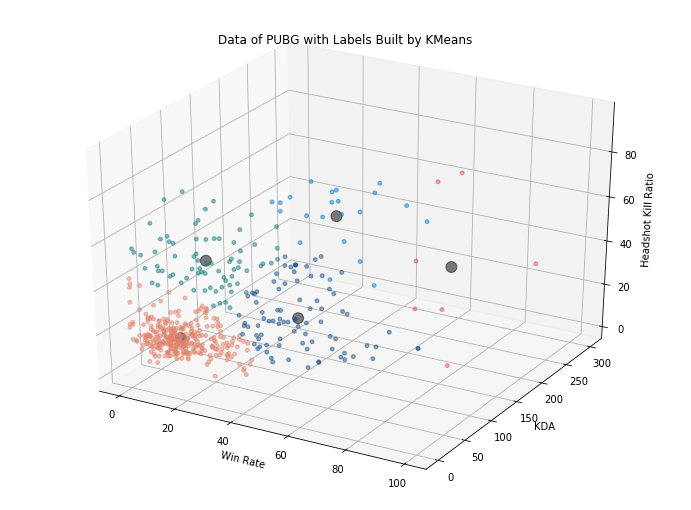

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

colors = ['#E4846C', '#19548E', '#E44B4E', '#197D7F', '#0282C9']
c_list = [colors[labels[i]] for i in range(m.shape[0])]

center = kmeans.cluster_centers_

plt.figure(figsize=(12, 9))
ax1 = plt.subplot(111,projection='3d')
x,y,z = m[:,0],m[:,1],m[:,2]

x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
ax1.scatter(x, y, z, s=15, color=c_list, alpha=0.5)
ax1.scatter(x_c, y_c, z_c, s=120, alpha=0.5, c='black')
ax1.set_title('Data of PUBG with Labels Built by KMeans')
ax1.set_zlabel('Headshot Kill Ratio')
ax1.set_ylabel('KDA')
ax1.set_xlabel('Win Rate')
plt.show()

AVG Distance On Foot：

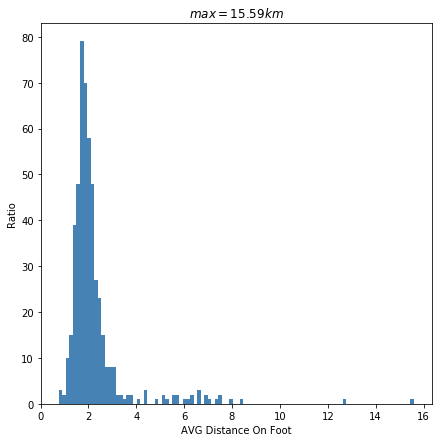

In [7]:
avg_dis_on_foot = asfloat(data[1:, -2:])
fig = plt.figure(figsize=(7,7))
max = avg_dis_on_foot[:, 0].max()
plt.hist(avg_dis_on_foot[:, 0], bins=100, color='steelblue')
plt.xlabel('AVG Distance On Foot')
plt.ylabel('Ratio')
plt.title('$max=%.2fkm$'% max)
plt.show()

draw the picture with label：

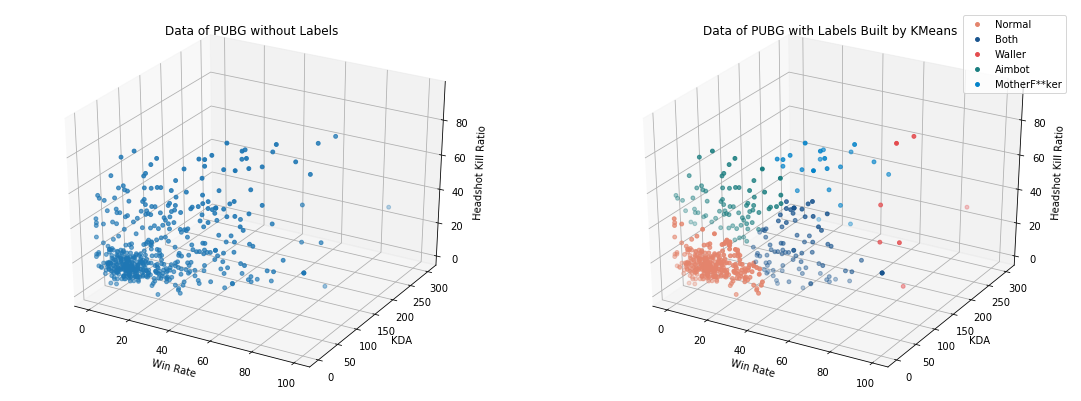

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

colors = ['#E4846C', '#19548E', '#E44B4E', '#197D7F', '#0282C9']
label_list = ['Normal', 'Both', 'Waller', 'Aimbot', 'MotherF**ker']

plt.figure(figsize=(19, 7))
ax = plt.subplot(122,projection='3d')
for i in range(5):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Headshot Kill Ratio') #坐标轴
ax.set_ylabel('KDA')
ax.set_xlabel('Win Rate')

ax1 = plt.subplot(121,projection='3d')
x,y,z = m[:,0],m[:,1],m[:,2]
ax1.scatter(x, y, z, s=15)
ax1.set_title('Data of PUBG without Labels')
ax1.set_zlabel('Headshot Kill Ratio') #坐标轴
ax1.set_ylabel('KDA')
ax1.set_xlabel('Win Rate')


plt.show()